In [237]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [238]:
SA = pd.read_csv('Files/CR-shortanswer.csv')[18:34]

In [239]:
SA_01 = pd.read_csv('Files/CR-expertshortanswer.csv',encoding= 'unicode_escape')[3:11]

In [240]:
def missing_fill_3(question):

    if "Strongly agree" not in question.keys():
        fill = pd.Series([0], index = ["Strongly agree"])
        question = question.add(fill, fill_value=0)
    
    if "Agree" not in question.keys():
        fill = pd.Series([0], index = ["Agree"])
        question = question.add(fill, fill_value=0)
    
    if "Somewhat agree" not in question.keys():
        fill = pd.Series([0], index = ["Somewhat agree"])
        question = question.add(fill, fill_value=0)
    
    if "Neither agree nor disagree" not in question.keys():
        fill = pd.Series([0], index = ["Neither agree nor disagree"])
        question = question.add(fill, fill_value=0)
    
    if "Somewhat disagree" not in question.keys():
        fill = pd.Series([0], index = ["Somewhat disagree"])
        question = question.add(fill, fill_value=0)
    
    if "Disagree" not in question.keys():
        fill = pd.Series([0], index = ["Disagree"])
        question = question.add(fill, fill_value=0)
    
    if "Strongly disagree" not in question.keys():
        fill = pd.Series([0], index = ["Strongly disagree"])
        question = question.add(fill, fill_value=0)

    else:
        question = question

    return question

In [241]:
def draw3(value, Width, xlabel, scale):
    fig = plt.figure(figsize=[15, 15])
    ax = fig.add_axes([0,0,1,1])

    barWidth = Width
    br = np.arange(7)
    
    for i in scale:
        q = value["Q3_" + str(i)].value_counts()

        ax.bar(br, missing_fill_3(q), width = 0.1, label = value["Q3_" + str(i)][0].split("-")[1])
        ax.margins(x=0.1)
        br = [x + barWidth for x in br]
        ax.legend()
        #ax.legend(title='Columns', bbox_to_anchor=(1, 1.02), loc='upper left')
    
    plt.xticks([r + barWidth for r in range(7)],
        xlabel)

Depicting multiple questions by grouping all bars for one question next to one another. 

In [242]:
def draw4(value, scale):
    Agree = []
    Disagree = []
    Neither = []
    Somewhat_agree = []
    Somewhat_disagree = []
    Strongly_agree = []
    Strongly_disagree = []

    for i in scale:
        q = value["Q3_" + str(i)].value_counts()
        dic = missing_fill_3(q).to_dict()
        
        Agree.append(dic['Agree'])
        Disagree.append(dic['Disagree'])
        Neither.append(dic['Neither agree nor disagree'])
        Somewhat_agree.append(dic['Somewhat agree'])
        Somewhat_disagree.append(dic['Somewhat disagree'])
        Strongly_agree.append(dic['Strongly agree'])
        Strongly_disagree.append(dic['Strongly disagree'])
    
    df = pd.DataFrame({'Strongly_agree': Strongly_agree,
                    'Agree': Agree,
                    'Somewhat_agree':Somewhat_agree,
                    'Neither': Neither,
                    'Somewhat_disagree': Somewhat_disagree,
                    'Disagree': Disagree,
                    'Strongly_disagree': Strongly_disagree}, index=scale)

 
    df.plot.bar(stacked=True, rot=0, figsize=(15,15),color={"Strongly_agree": "#4575b4", "Agree":"#91bfdb", "Somewhat_agree":"#e0f3f8",
                                                            "Neither": "#f7f7f7", "Somewhat_disagree":"#fee090", "Disagree":"#fc8d59",
                                                            "Strongly_disagree": "#d73027"}).legend(bbox_to_anchor =(1.2, 1))
                                            

Depicting multiple questions by grouping all bars for one question next to one another. Add agree attitude together and disagree attitude together.  

In [243]:
def draw5(value, scale):
    Agree = []
    Disagree = []
    Neither = []

    for i in scale:
        q = value["Q3_" + str(i)].value_counts()
        dic = missing_fill_3(q).to_dict()
        
        Agree.append(dic['Agree'] + dic['Strongly agree'] + dic['Somewhat agree'])
        Disagree.append(dic['Disagree'] + dic['Somewhat disagree'] + dic['Strongly disagree'])
        Neither.append(dic['Neither agree nor disagree'])

    df = pd.DataFrame({'Agree': Agree,'Neither': Neither,'Disagree': Disagree}, index=scale)

    df.plot.bar(stacked=True, rot=0, figsize=(15,15),color={"Agree": "#91bfdb", 
                                                            "Neither": "#ffffbf",
                                                            "Disagree": "#fc8d59"}).legend(bbox_to_anchor =(1.2, 1))



In [244]:
a = ['Strongly agree','Agree', 'Somewhat agree', 'Neither agree nor disagree',
       'Somewhat disagree', 'Disagree', 'Strongly disagree']

Software General Usability (student)      

In [245]:
#scale = [1, 2, 3, 4, 7]
#draw3(SA, 0.1, a, scale)

#plt.savefig(os.path.join('Pics/Question Classifier/Software General Usability.png'), dpi=300, format='png', bbox_inches='tight')
#plt.title("Software General Usability")

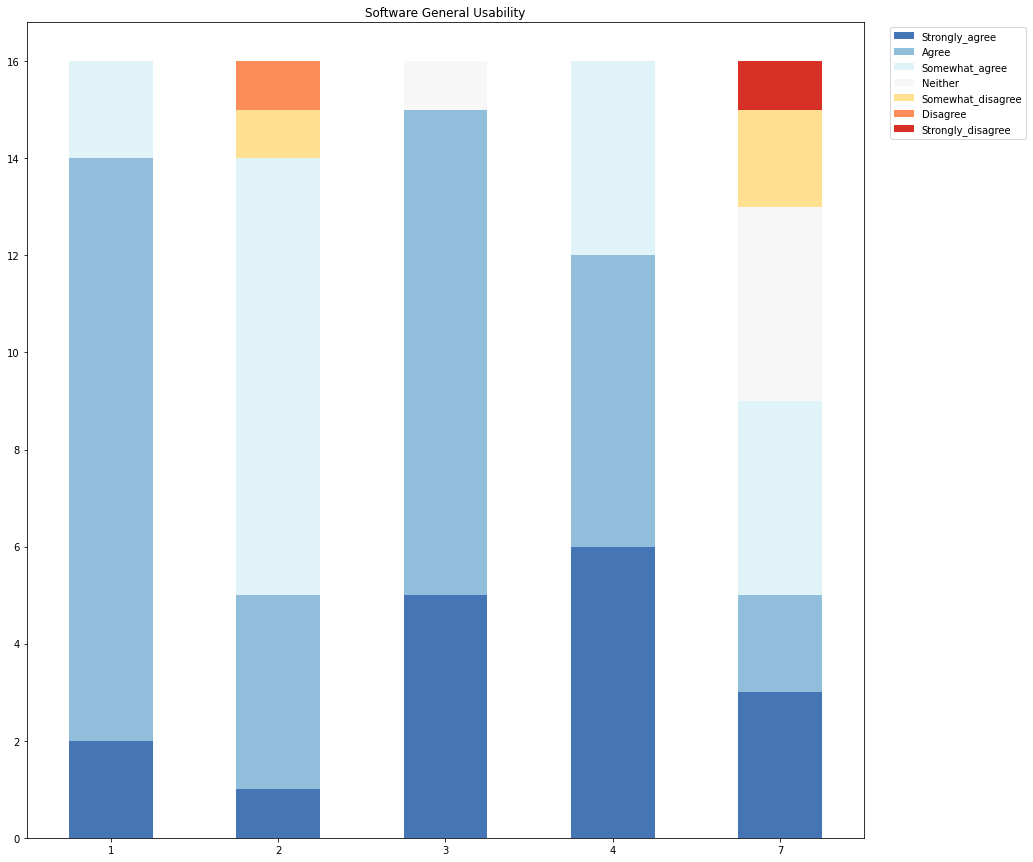

In [246]:
scale = [1, 2, 3, 4, 7]
draw4(SA, scale)

plt.title("Software General Usability")
plt.savefig(os.path.join('Pics/Question Classifier/Software General Usability.png'), format='png', bbox_inches='tight')


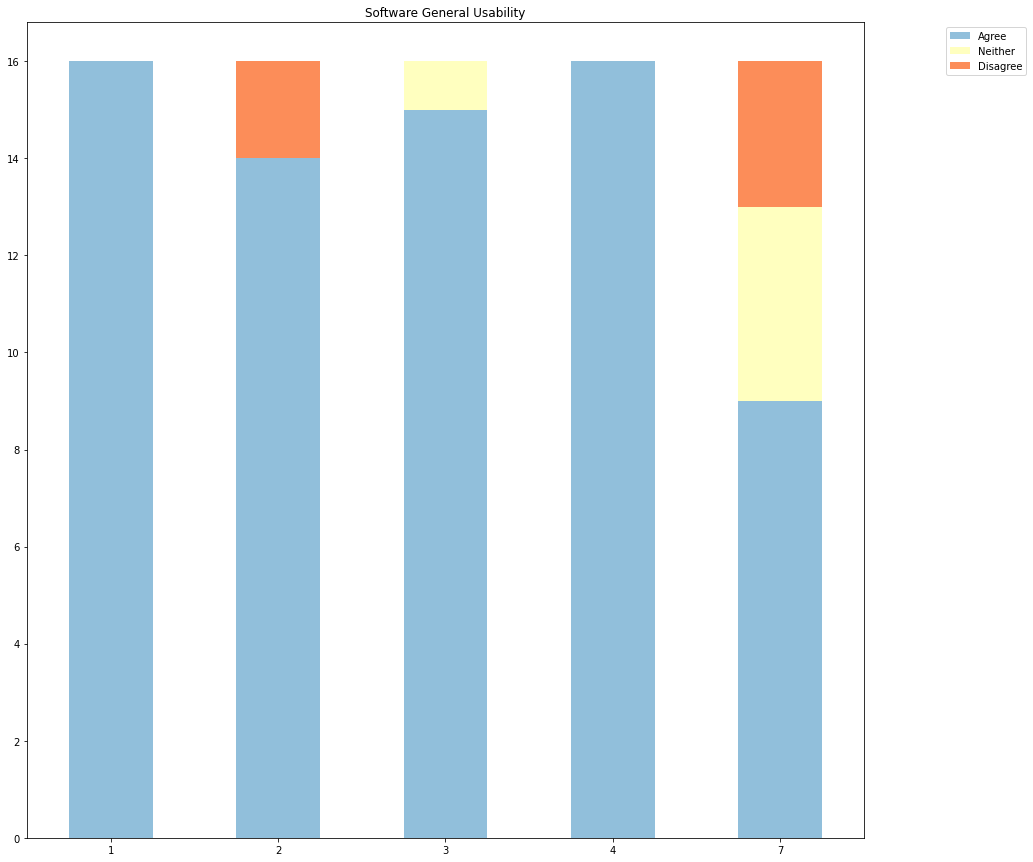

In [247]:
scale = [1, 2, 3, 4, 7]
draw5(SA, scale)

plt.title("Software General Usability")
plt.savefig(os.path.join('Pics/Question Classifier/V.2/Software General Usability.png'), dpi=300, format='png', bbox_inches='tight')


Software General Usability (expert)      

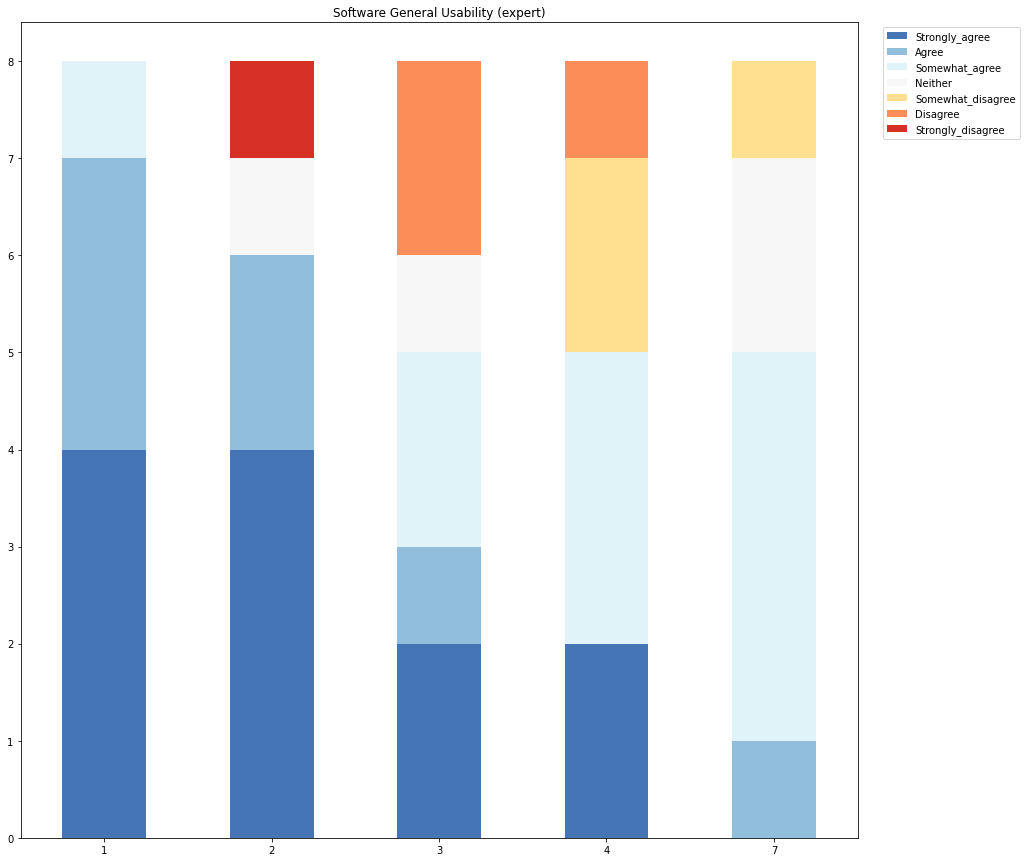

In [248]:
scale = [1, 2, 3, 4, 7]
draw4(SA_01, scale)

plt.title("Software General Usability (expert)")
plt.savefig(os.path.join('Expert Pics/Question Classifier/Software General Usability.png'), format='png', bbox_inches='tight')


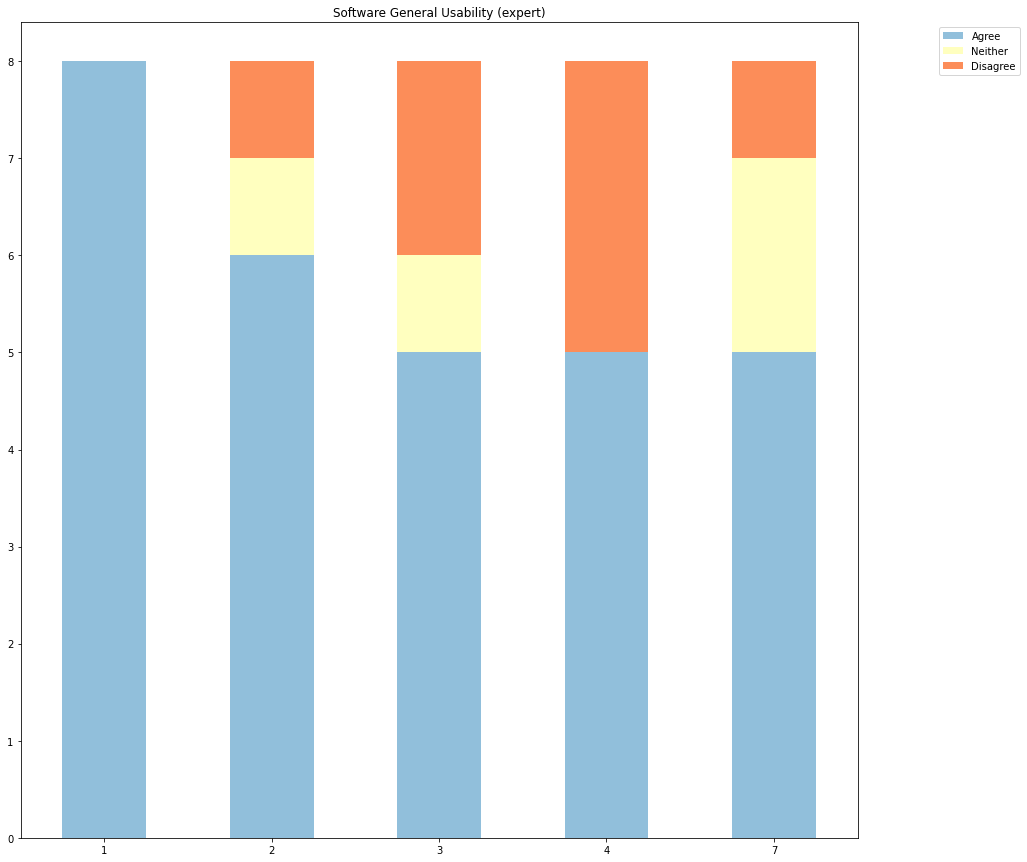

In [249]:
scale = [1, 2, 3, 4, 7]
draw5(SA_01, scale)

plt.title("Software General Usability (expert)")
plt.savefig(os.path.join('Expert Pics/Question Classifier/V.2/Software General Usability.png'), dpi=300, format='png', bbox_inches='tight')


Vocabulary convergence features (student)

In [250]:
#scale = [5, 6, 13, 14]
#draw3(SA, 0.1, a, scale)

#plt.savefig(os.path.join('Pics/Question Classifier/Vocabulary convergence features.png'), dpi=300, format='png', bbox_inches='tight')
#plt.title("Vocabulary convergence features")

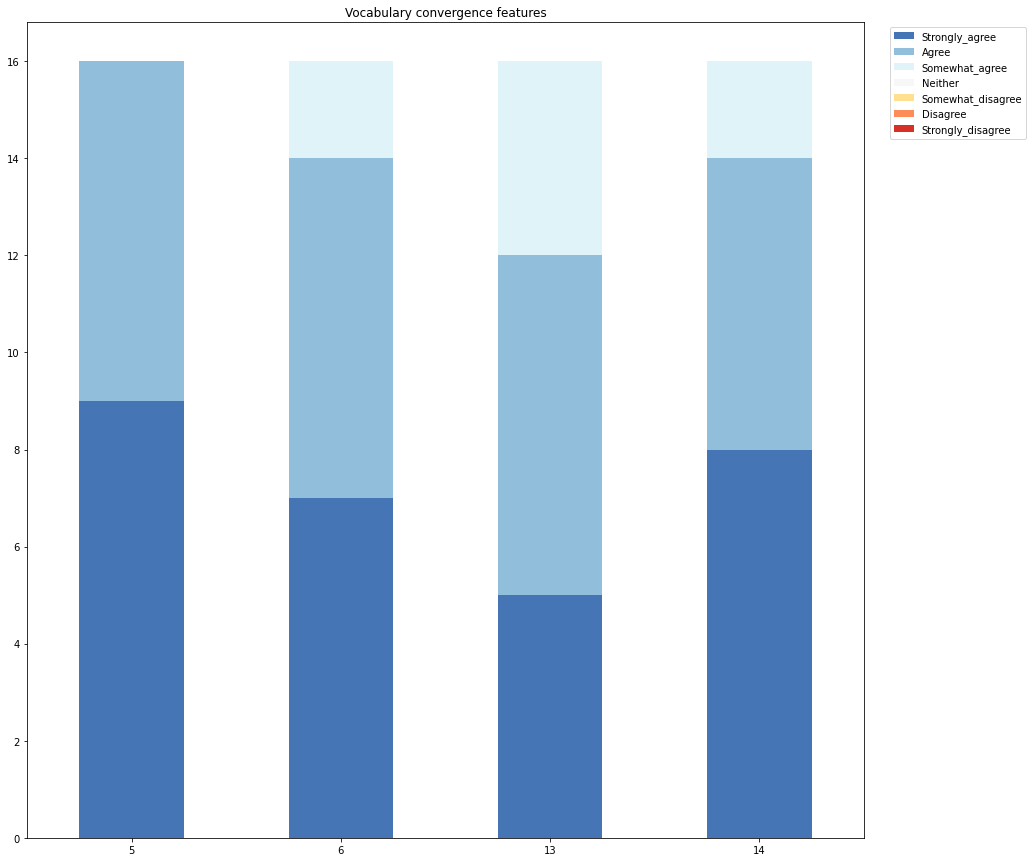

In [251]:
scale = [5, 6, 13, 14]
draw4(SA, scale)

plt.title("Vocabulary convergence features")
plt.savefig(os.path.join('Pics/Question Classifier/Vocabulary convergence features.png'), dpi=300, format='png', bbox_inches='tight')


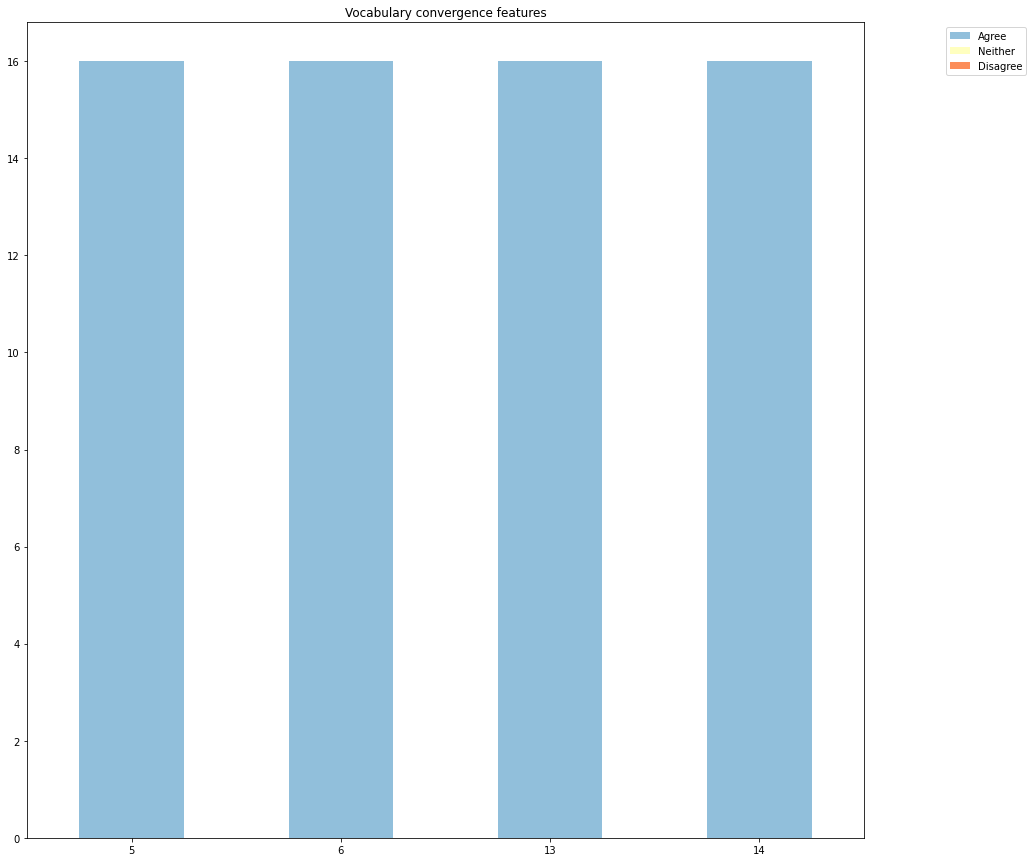

In [252]:
scale = [5, 6, 13, 14]
draw5(SA, scale)

plt.title("Vocabulary convergence features")
plt.savefig(os.path.join('Pics/Question Classifier/V.2/Vocabulary convergence features.png'), dpi=300, format='png', bbox_inches='tight')


Vocabulary convergence features (expert)

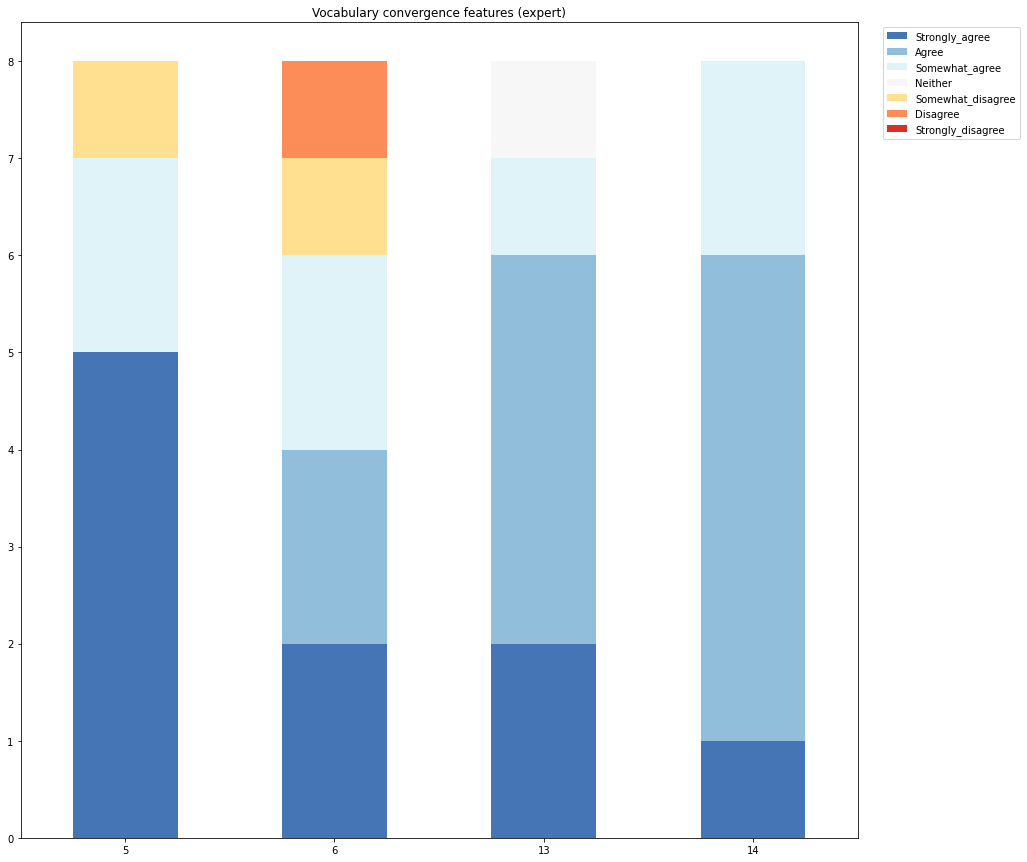

In [253]:
scale = [5, 6, 13, 14]
draw4(SA_01, scale)

plt.title("Vocabulary convergence features (expert)")
plt.savefig(os.path.join('Expert Pics/Question Classifier/Vocabulary convergence features.png'), dpi=300, format='png', bbox_inches='tight')


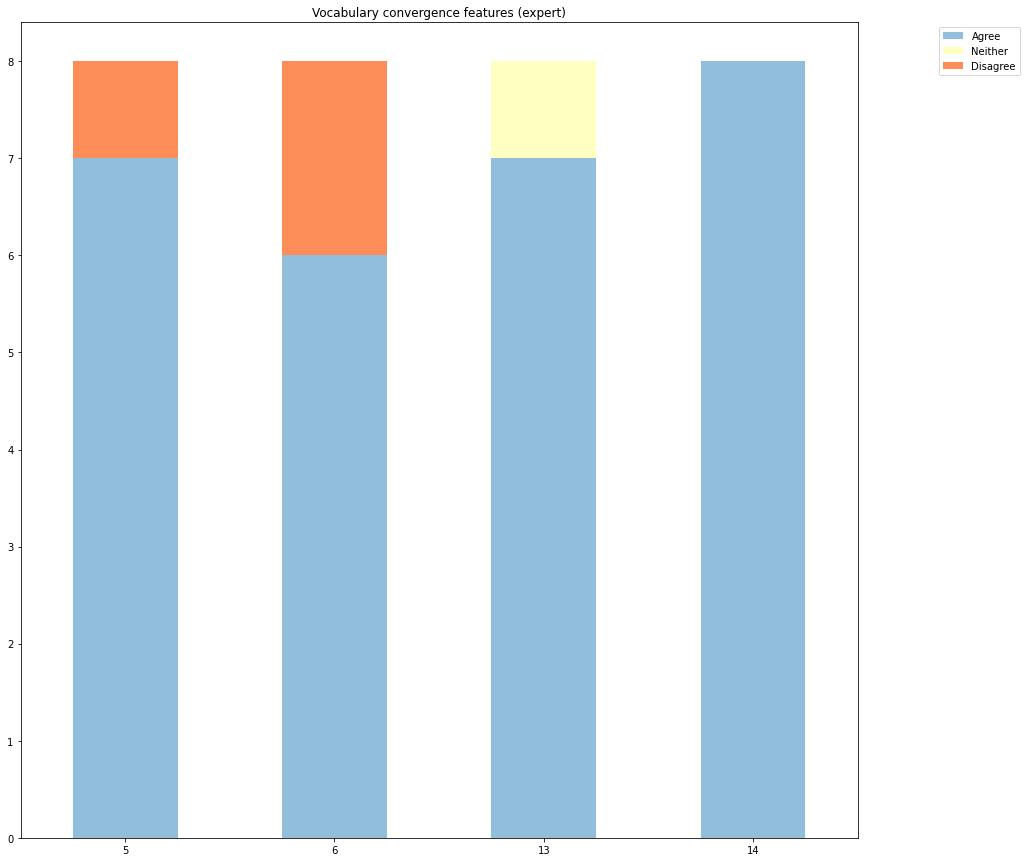

In [254]:
scale = [5, 6, 13, 14]
draw5(SA_01, scale)

plt.title("Vocabulary convergence features (expert)")
plt.savefig(os.path.join('Expert Pics/Question Classifier/V.2/Vocabulary convergence features.png'), dpi=300, format='png', bbox_inches='tight')


Software General Usability (student)      

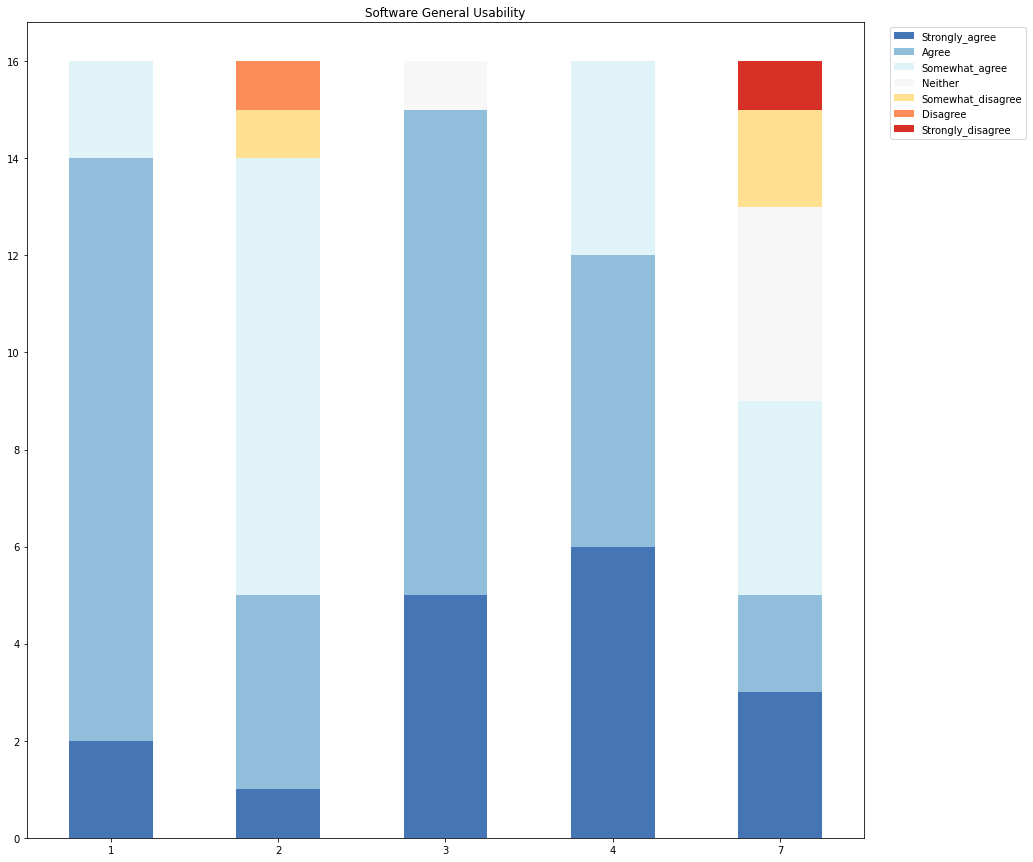

In [255]:
scale = [1, 2, 3, 4, 7]
draw4(SA, scale)

plt.title("Software General Usability")
plt.savefig(os.path.join('Pics/Question Classifier/Software General Usability.png'), format='png', bbox_inches='tight')


Software General Usability (expert)      

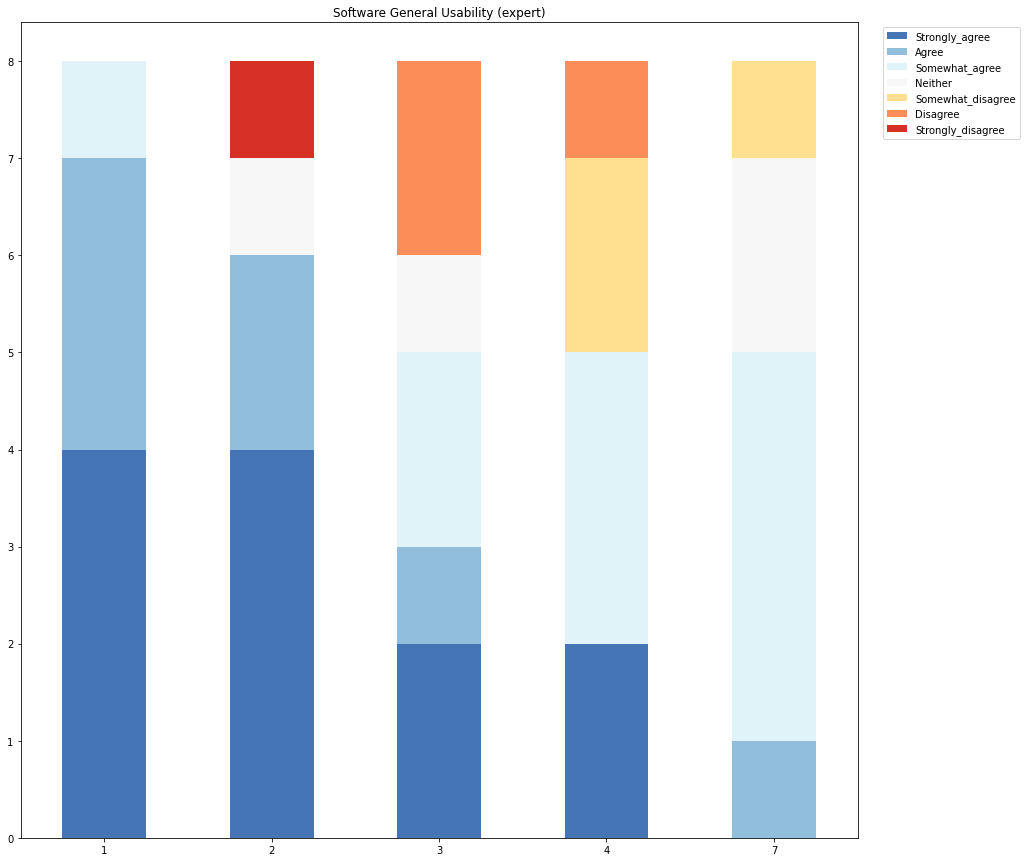

In [256]:
scale = [1, 2, 3, 4, 7]
draw4(SA_01, scale)

plt.title("Software General Usability (expert)")
plt.savefig(os.path.join('Expert Pics/Question Classifier/Software General Usability.png'), format='png', bbox_inches='tight')


Psychological features (student)

In [257]:
#scale = [10, 11]
#draw3(SA, 0.1, a, scale)

#plt.savefig(os.path.join('Pics/Question Classifier/Psychological features.png'), dpi=300, format='png', bbox_inches='tight')
#plt.title("Psychological featuress")

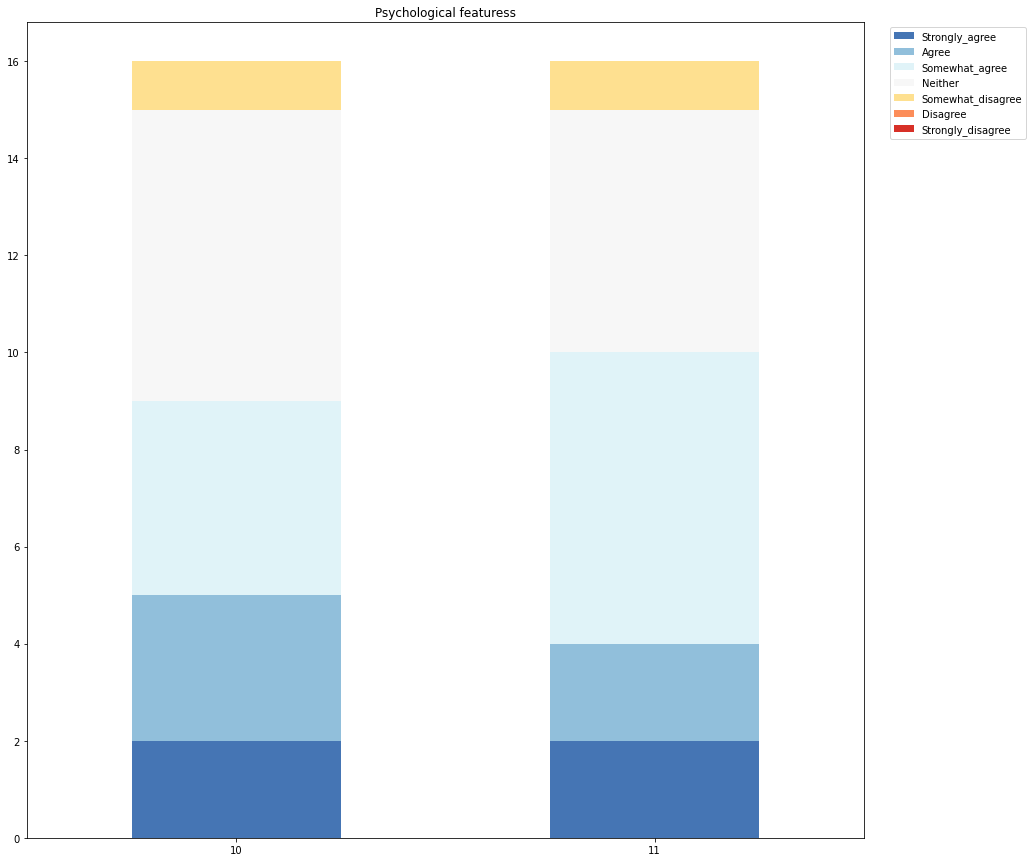

In [258]:
scale = [10, 11]
draw4(SA, scale)

plt.title("Psychological featuress")
plt.savefig(os.path.join('Pics/Question Classifier/Psychological features.png'), dpi=300, format='png', bbox_inches='tight')


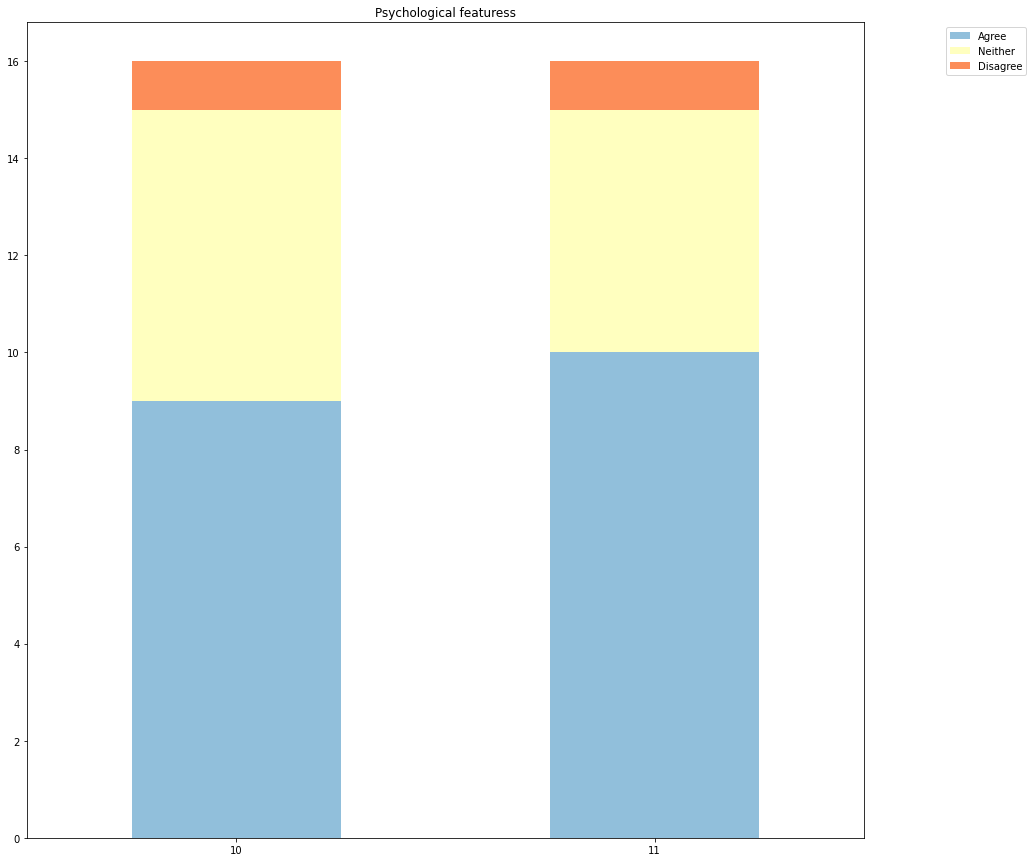

In [259]:
scale = [10, 11]
draw5(SA, scale)

plt.title("Psychological featuress")
plt.savefig(os.path.join('Pics/Question Classifier/V.2/Psychological features.png'), dpi=300, format='png', bbox_inches='tight')


Psychological features (expert)

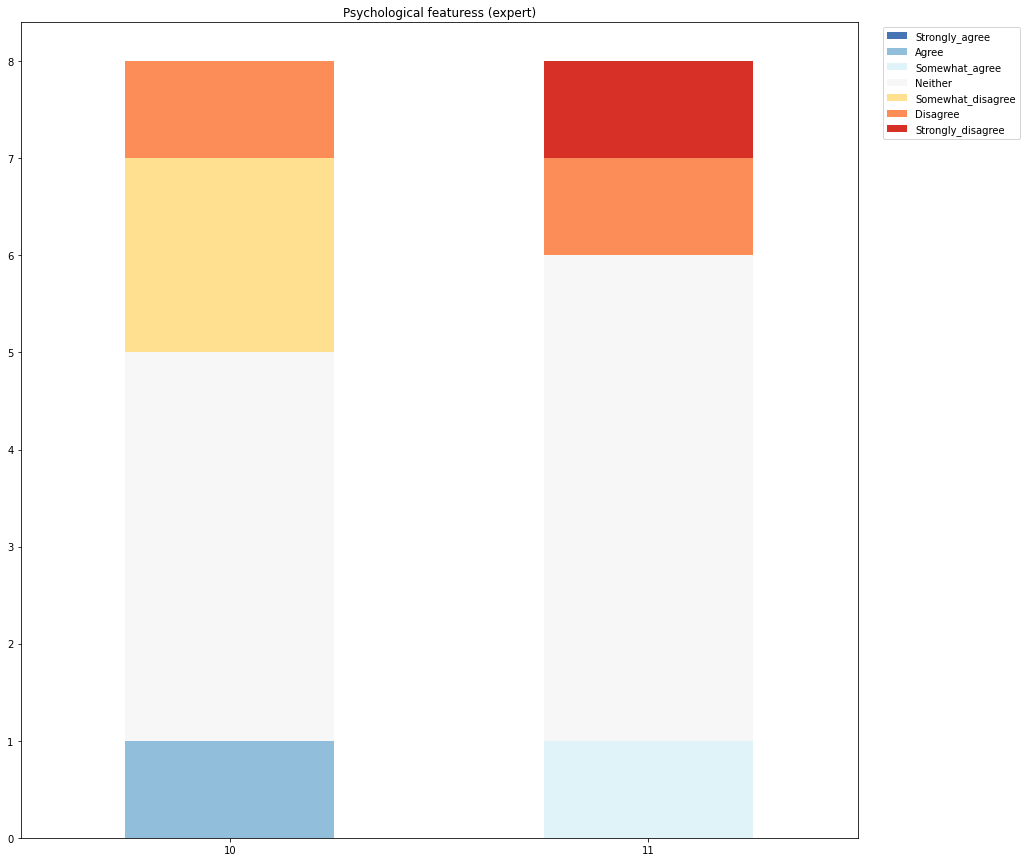

In [260]:
scale = [10, 11]
draw4(SA_01, scale)

plt.title("Psychological featuress (expert)")
plt.savefig(os.path.join('Expert Pics/Question Classifier/Psychological features.png'), dpi=300, format='png', bbox_inches='tight')


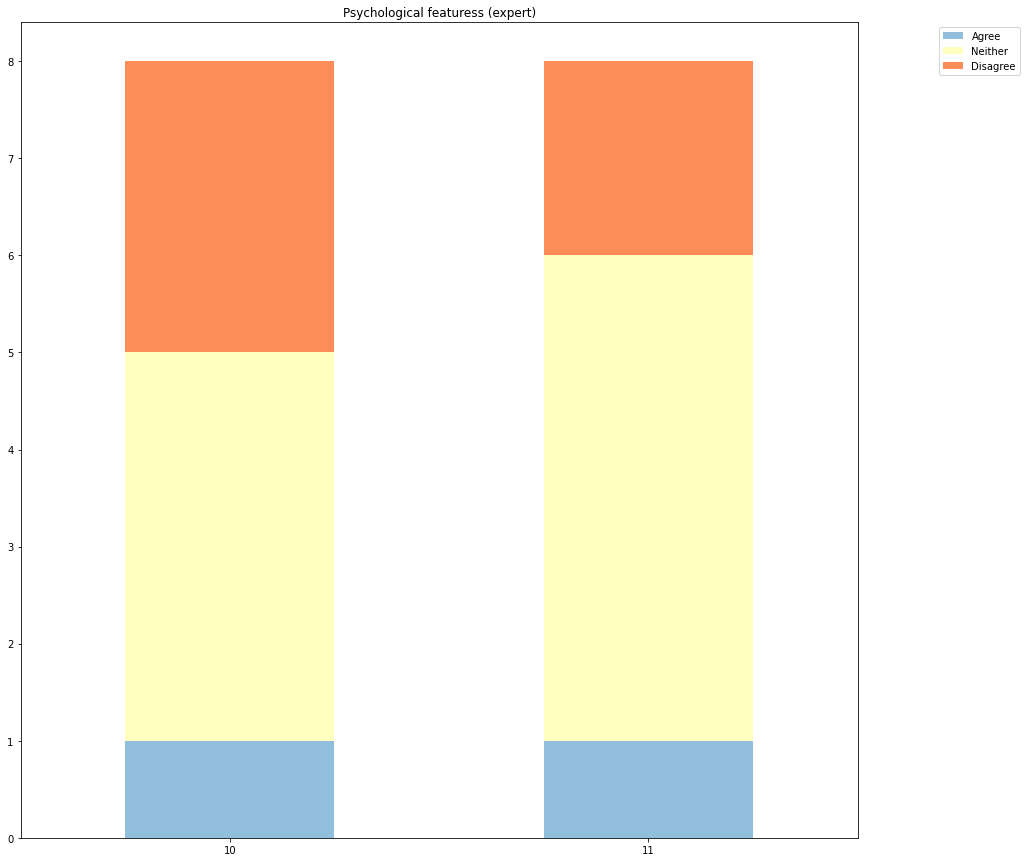

In [261]:
scale = [10, 11]
draw5(SA_01, scale)

plt.title("Psychological featuress (expert)")
plt.savefig(os.path.join('Expert Pics/Question Classifier/V.2/Psychological features.png'), dpi=300, format='png', bbox_inches='tight')


Overall Preference (student)

In [262]:
#scale = [9, 16, 8, 15]
#draw3(SA, 0.1, a, scale)

#plt.savefig(os.path.join('Pics/Question Classifier/Overall Preference.png'), dpi=300, format='png', bbox_inches='tight')
#plt.title("Overall Preference")

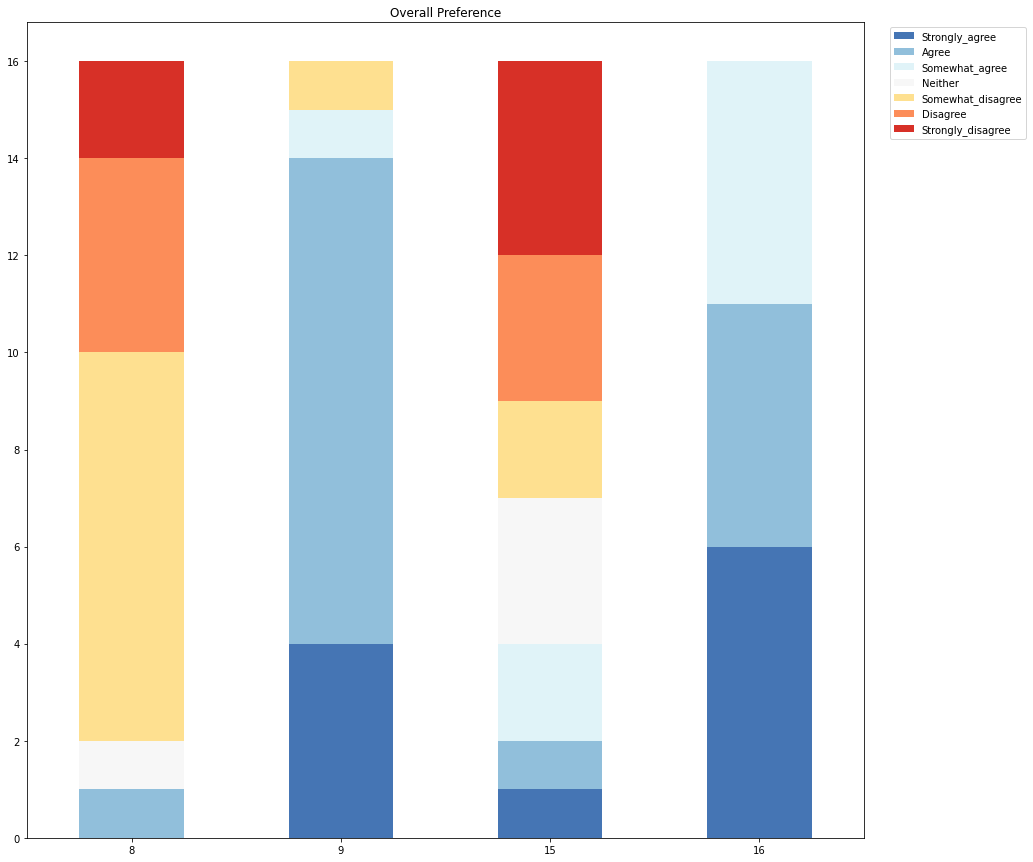

In [263]:
scale = [8, 9, 15, 16]
draw4(SA, scale)

plt.title("Overall Preference")
plt.savefig(os.path.join('Pics/Question Classifier/Overall Preference.png'), dpi=300, format='png', bbox_inches='tight')


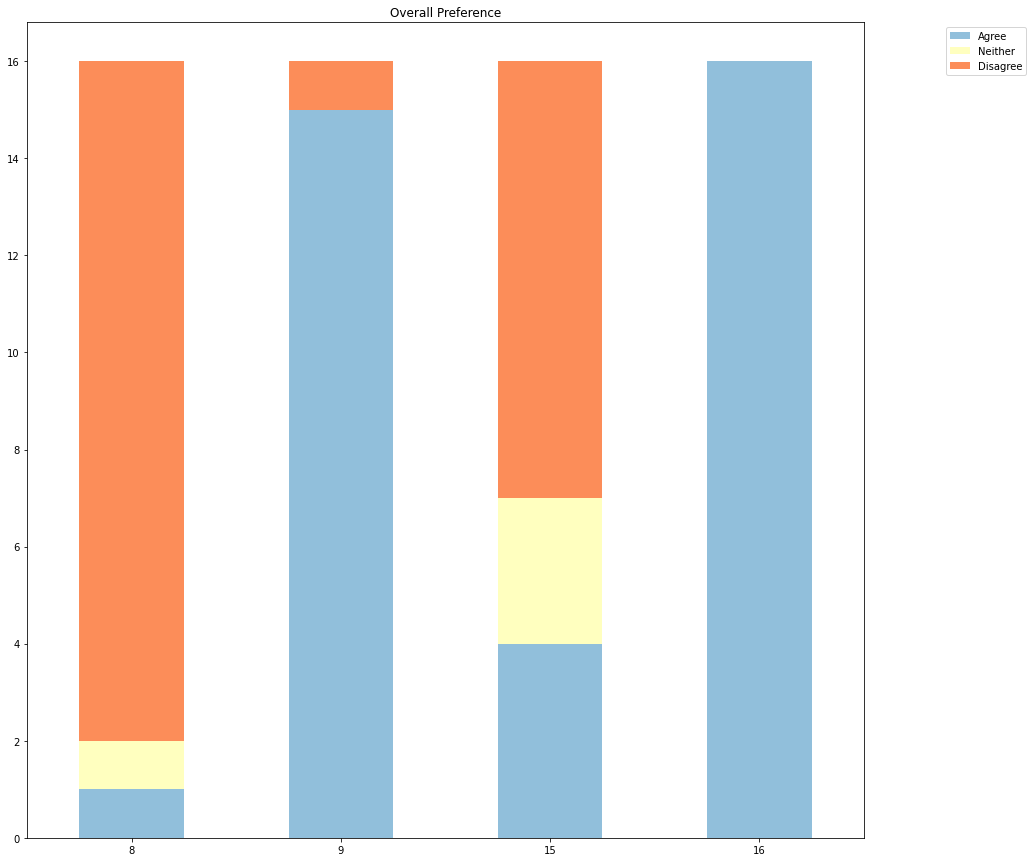

In [264]:
scale = [8, 9, 15, 16]
draw5(SA, scale)

plt.title("Overall Preference")
plt.savefig(os.path.join('Pics/Question Classifier/V.2/Overall Preference.png'), dpi=300, format='png', bbox_inches='tight')


Overall Preference (expert)

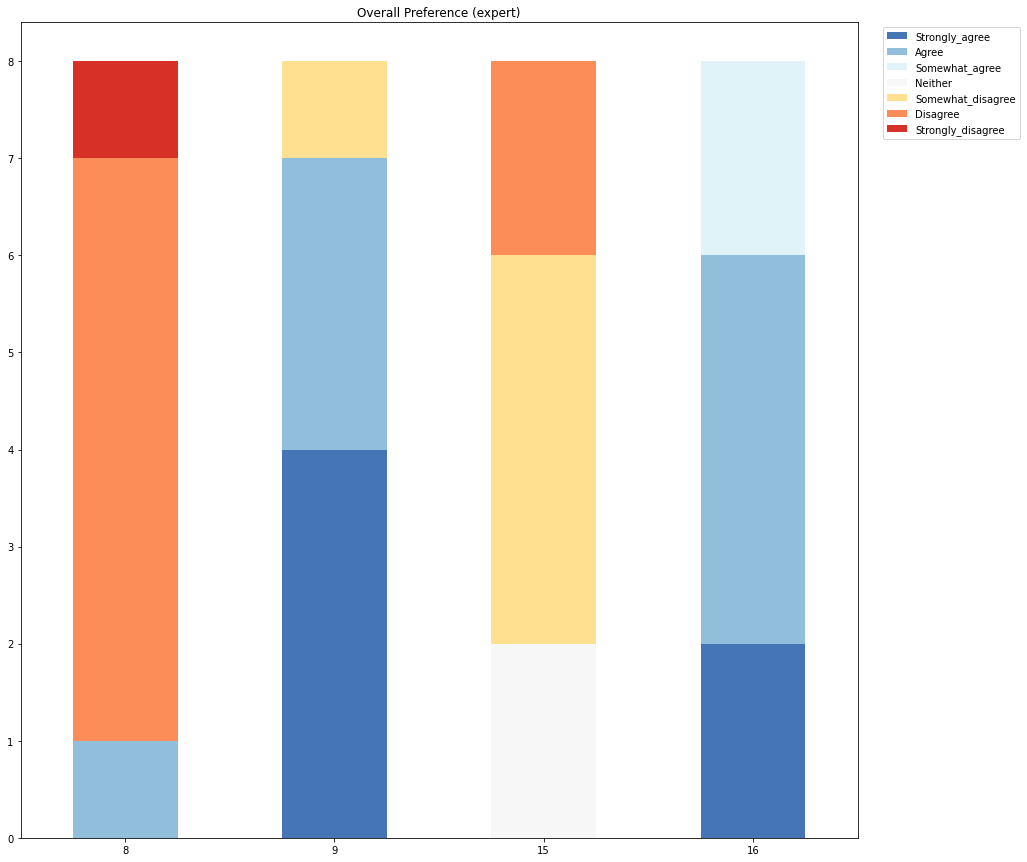

In [265]:
scale = [8, 9, 15, 16]
draw4(SA_01, scale)

plt.title("Overall Preference (expert)")
plt.savefig(os.path.join('Expert Pics/Question Classifier/Overall Preference.png'), dpi=300, format='png', bbox_inches='tight')


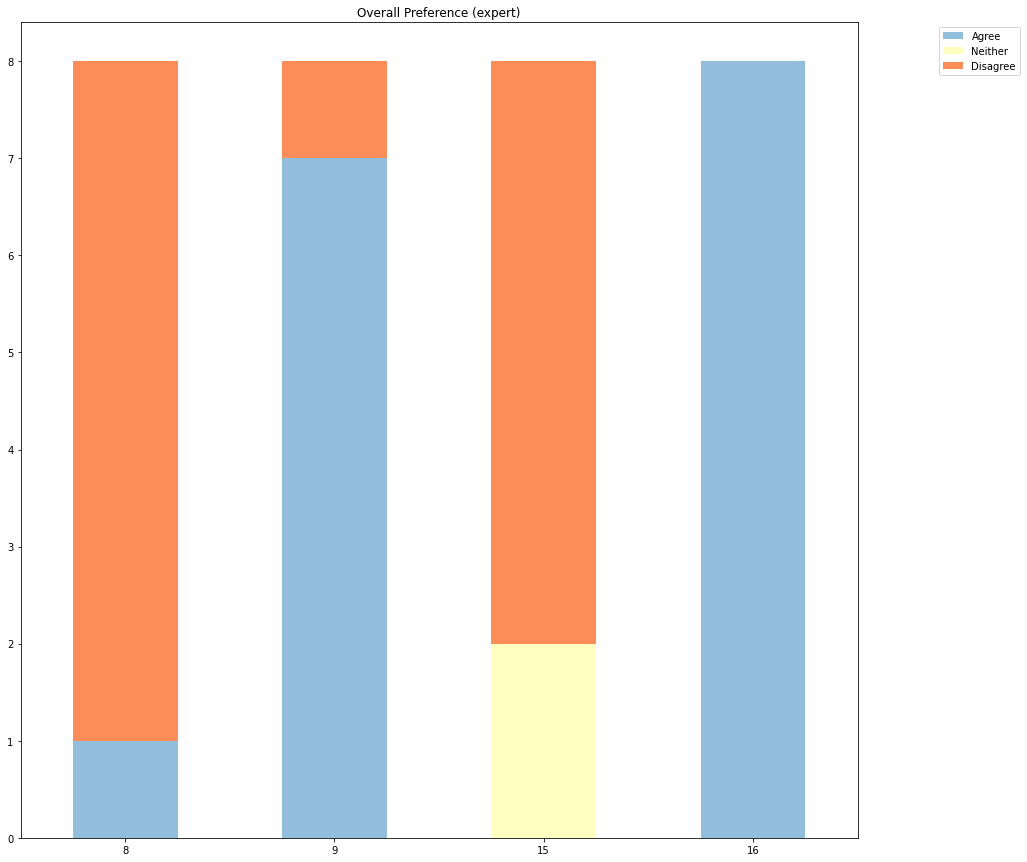

In [266]:
scale = [8, 9, 15, 16]
draw5(SA_01, scale)

plt.title("Overall Preference (expert)")
plt.savefig(os.path.join('Expert Pics/Question Classifier/V.2/Overall Preference.png'), dpi=300, format='png', bbox_inches='tight')


In [267]:
SA_title = pd.read_csv('Files/CR-shortanswer.csv')

In [268]:
def draw6(value, scale):
    category_names = ['Agree', 'Neither', 'Disagree']
    results = {}
    question = 0
    
    for i in scale:
        q = value["Q3_" + str(i)].value_counts()
        dic = missing_fill_3(q).to_dict()
        
        Agree = (dic['Agree'] + dic['Strongly agree'] + dic['Somewhat agree'])
        Disagree = (dic['Disagree'] + dic['Somewhat disagree'] + dic['Strongly disagree'])
        Neither = (dic['Neither agree nor disagree'])

        new = [Agree, Neither, Disagree]
        
        results[SA_title["Q3_" + str(i)][0][60:]] = new
        question += 1

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('coolwarm')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'black'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
            
    ax.legend(bbox_to_anchor=(1.05, 1), fontsize='small')

    return fig, ax

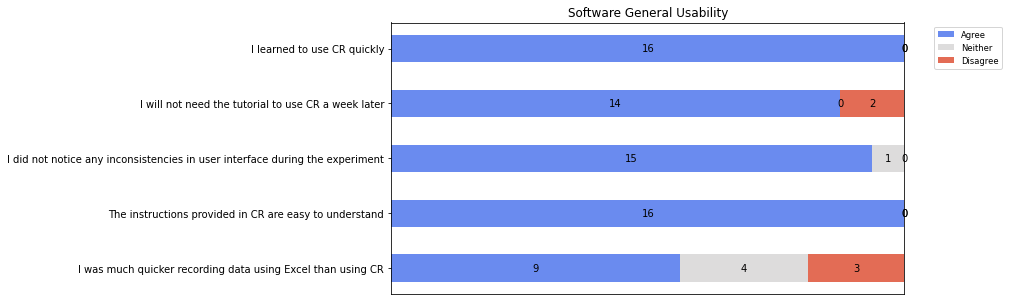

In [269]:
scale = [1, 2, 3, 4, 7]
draw6(SA, scale)

plt.title("Software General Usability")
plt.savefig(os.path.join('Pics/Question Classifier/V.3/Software General Usability.png'), dpi=300, format='png', bbox_inches='tight')


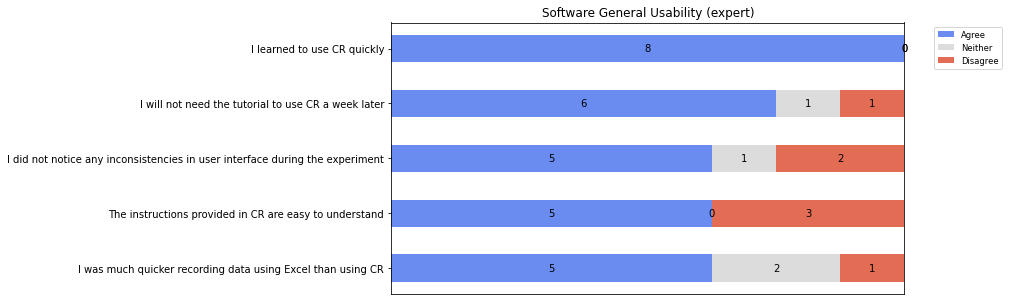

In [270]:
scale = [1, 2, 3, 4, 7]
draw6(SA_01, scale)

plt.title("Software General Usability (expert)")
plt.savefig(os.path.join('Expert Pics/Question Classifier/V.3/Software General Usability.png'), dpi=300, format='png', bbox_inches='tight')


In [271]:
def draw7(value, scale):
    category_names = ['Strongly agree','Agree', 'Somewhat agree', 'Neither agree nor disagree',
       'Somewhat disagree', 'Disagree', 'Strongly disagree']
    results = {}
    question = 0
    
    for i in scale:
        q = value["Q3_" + str(i)].value_counts()
        dic = missing_fill_3(q).to_dict()
        
        Agree = (dic['Agree'])
        Disagree = (dic['Disagree'])
        Neither = (dic['Neither agree nor disagree'])
        Somewhat_agree = (dic['Somewhat agree'])
        Somewhat_disagree = (dic['Somewhat disagree'])
        Strongly_agree = (dic['Strongly agree'])
        Strongly_disagree = (dic['Strongly disagree'])

        new = [Strongly_agree, Agree,Somewhat_agree, Neither,Somewhat_disagree,Disagree, Strongly_disagree]
        
        results[SA_title["Q3_" + str(i)][0][60:]] = new
        question += 1

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('coolwarm')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'black'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
            
    ax.legend(bbox_to_anchor=(1.05, 1), fontsize='small')

    return fig, ax

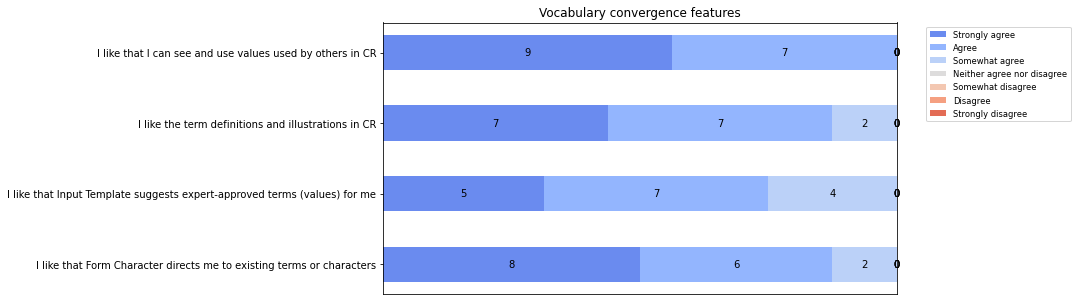

In [272]:
scale = [5, 6, 13, 14]
draw7(SA, scale)

plt.title("Vocabulary convergence features")
plt.savefig(os.path.join('Pics/Question Classifier/V.3/Vocabulary convergence features.png'), dpi=300, format='png', bbox_inches='tight')


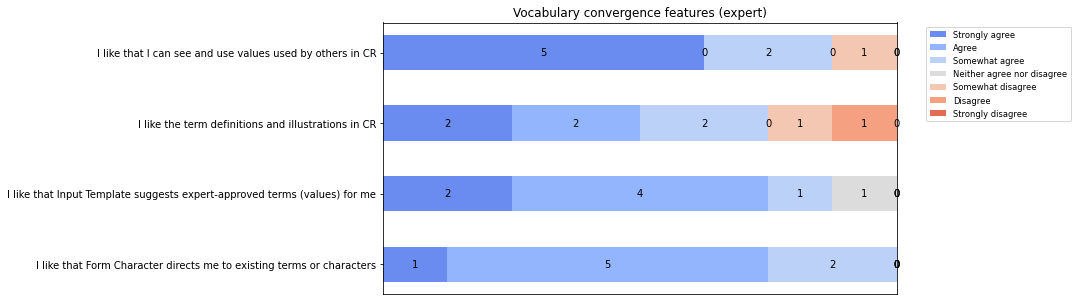

In [273]:
scale = [5, 6, 13, 14]
draw7(SA_01, scale)

plt.title("Vocabulary convergence features (expert)")
plt.savefig(os.path.join('Expert Pics/Question Classifier/V.3/Vocabulary convergence features.png'), dpi=300, format='png', bbox_inches='tight')


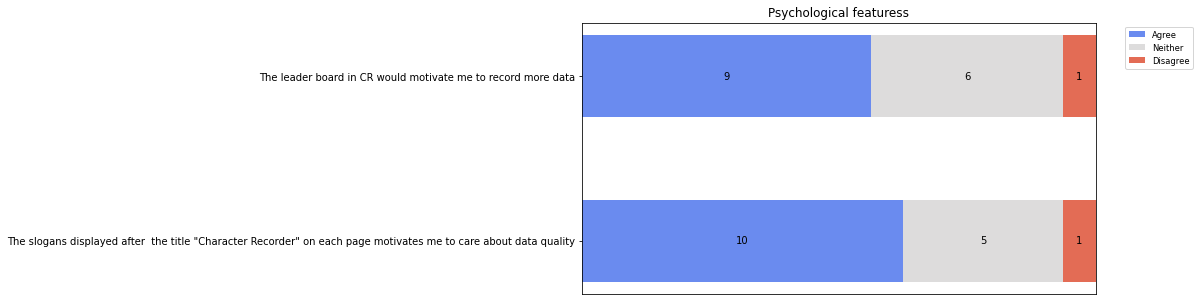

In [274]:
scale = [10, 11]
draw6(SA, scale)

plt.title("Psychological featuress")
plt.savefig(os.path.join('Pics/Question Classifier/V.3/Psychological features.png'), dpi=300, format='png', bbox_inches='tight')


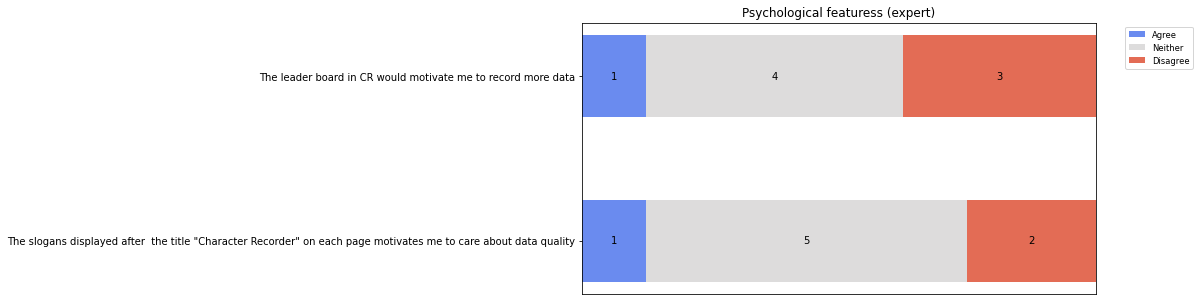

In [275]:
scale = [10, 11]
draw6(SA_01, scale)

plt.title("Psychological featuress (expert)")
plt.savefig(os.path.join('Expert Pics/Question Classifier/V.3/Psychological features.png'), dpi=300, format='png', bbox_inches='tight')


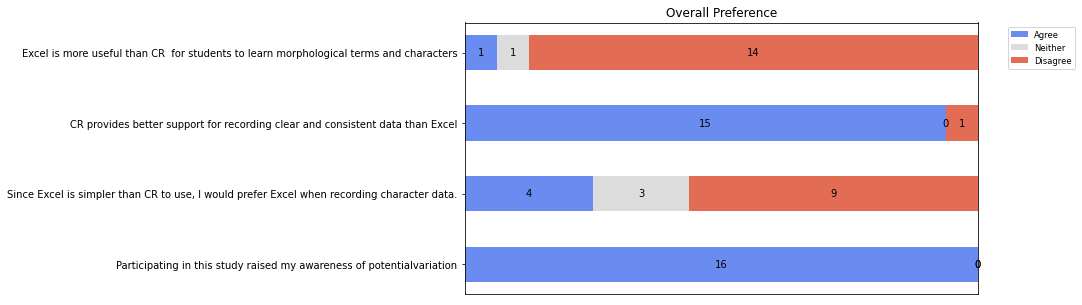

In [276]:
scale = [8, 9, 15, 16]
draw6(SA, scale)

plt.title("Overall Preference")
plt.savefig(os.path.join('Pics/Question Classifier/V.3/Overall Preference.png'), dpi=300, format='png', bbox_inches='tight')


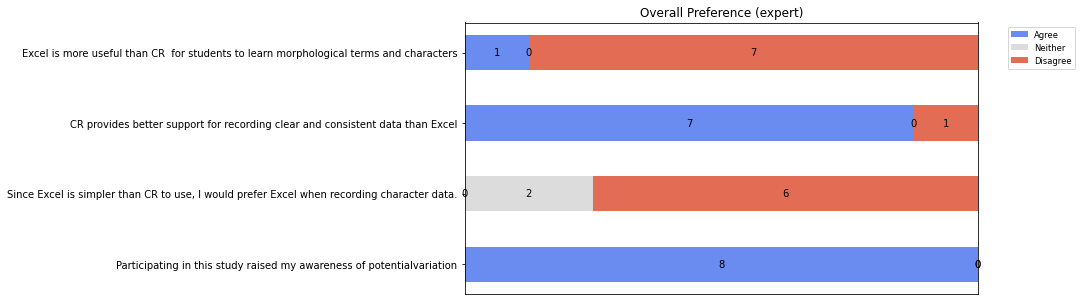

In [277]:
scale = [8, 9, 15, 16]
draw6(SA_01, scale)

plt.title("Overall Preference (expert)")
plt.savefig(os.path.join('Expert Pics/Question Classifier/V.3/Overall Preference.png'), dpi=300, format='png', bbox_inches='tight')
